<a href="https://colab.research.google.com/github/15021996/Startup-Funding-Prediction/blob/main/Soumya_Startup_Funding_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g4N7JEb9FhyywqcCsE5mVkz8s63ALgwajoAw54M1xi2C2uIPKAm32M
Mounted at /content/drive


In [ ]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(rc={'figure.figsize':(10,6)})
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing data in a readable format
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 4/Week 4/data_driven_investment_1.csv')

In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.groupby('UUID',)

In [ ]:
df.shape

(1502175, 20)

In [ ]:
df.isnull().sum().sort_values(ascending =False)

Total Funding (USD)     1499920
City                    1499768
Latest Funded Date      1499761
Business Models         1499761
Practice Areas          1499761
Overview                1499761
Founded Year            1499761
Feed Name               1499761
Company Stage           1499761
MAU                     1384088
Uninstall_Rate          1149906
Total_Session_Time       624510
Open_Rate                624460
Avg_Session_Time         624443
Reach                    451300
UUID                       1482
Region                        0
Application Category          0
month                         0
funding_ind                   0
dtype: int64

In [ ]:
# checking for null values in the dataset
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
UUID,1482,0.098657
month,0,0.000000
Application Category,0,0.000000
Avg_Session_Time,624443,41.569258
Business Models,1499761,99.839300
City,1499768,99.839766
Company Stage,1499761,99.839300
Feed Name,1499761,99.839300
Founded Year,1499761,99.839300
Latest Funded Date,1499761,99.839300


In [ ]:
len(df['Application Category'].value_counts())

48

In [ ]:
df.UUID.value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
                                            ... 
5f7cfaa5b0743b6fb84d9a27feb499fde61a3a12       1
d8bc7f9d5f5b2717a837858c91faf58f26d0ab33       1
f4b22f4e4991332a8afa1a985ea5a7ea19b3e1e5       1
2547b7356a7729c274e3ad70dc9648f0d2543ad5       1
dd8ec473897e01ee0cac81768bcea848288cc841       1
Name: UUID, Length: 147741, dtype: int64

In [ ]:
df.Avg_Session_Time.values_counts(ascending=False)

1091628    58.561333
887037     57.053500
1293234    56.568033
153882     56.345450
949186     55.521533
             ...    
1502170          NaN
1502171          NaN
1502172          NaN
1502173          NaN
1502174          NaN
Name: Avg_Session_Time, Length: 1502175, dtype: float64

In [ ]:
df['Business Models'].value_counts()

Social Platforms > Interest Based > Education > Higher Education > Q&A Platforms\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced                                                                              232
OTT Video > OTT Streaming Platforms > Video On Demand (VOD) > News                                                                                                                                                                 124
K-12 EdTech > B2C Learning Solutions > School Curriculum > Multi Subject > Horizontal\nTest Preparation Tech > Digital Learning > Diversified > Self-Paced\nY Combinator Batches > 2020 > Winter                                   117
Food & Beverage Products > Beverages > Juices and Dilutables > Juices > Cold-pressed                                                                                                                                               113
Influencer E-Commerce > Live Video\nVideo Commerce > Live Stream Commerce   

## Looking at the Target Variable(We have imbalanced dataset)

In [ ]:
df.funding_ind.value_counts()

0    1499761
1       2414
Name: funding_ind, dtype: int64

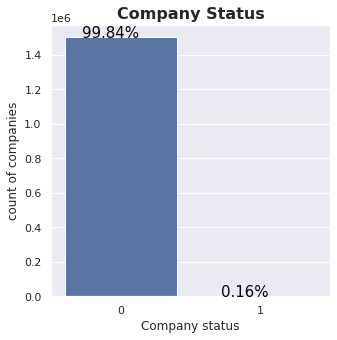

In [ ]:
# checking the dependent variable --> `Company status`
plt.figure(figsize=(5,5))
ax=sns.countplot(df["funding_ind"])
plt.title("Company Status",{'fontsize':16,
        'fontweight':"bold"})

plt.ylabel("count of companies")
plt.xlabel("Company status")
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

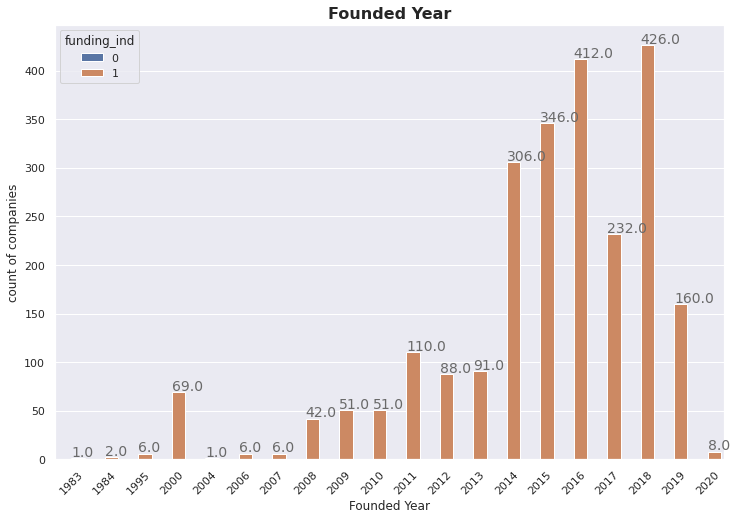

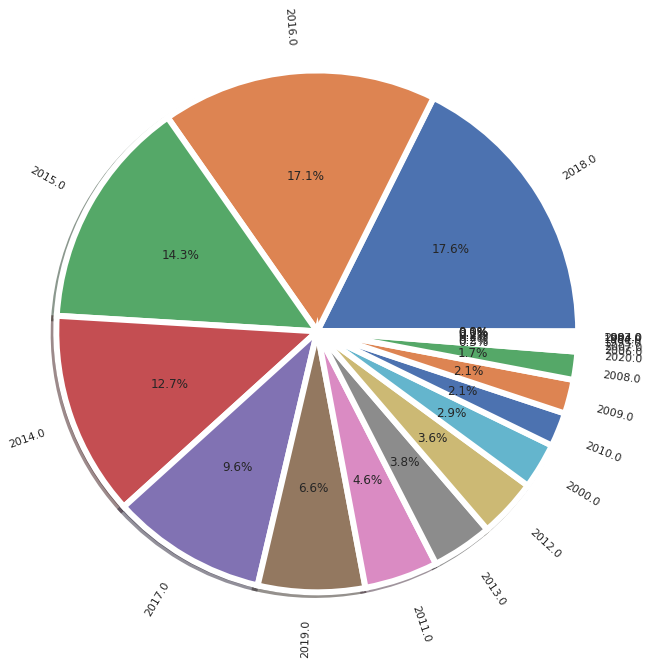

In [ ]:
font={'weight' : 'bold','size': 16}
plt.figure(figsize=(12,8))
ax=sns.countplot(df["Founded Year"].dropna().astype(int),hue=df["funding_ind"])
plt.title("Founded Year",**font)
plt.ylabel("count of companies")
plt.xticks(rotation=45)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey')
plt.show()
(df["Founded Year"].value_counts()).plot.pie(autopct="%.1f%%",shadow=True,rotatelabels=True,wedgeprops={'linewidth': 6},radius=2)
plt.show()